# Поиск приближенных значений корней нелинейных уравнений

Требуется с точностью $ \varepsilon = 10^{-3}/10^{-6}/10^{-9} $ найти приближенное значение корня уравнения на интервале $ (0, 10) $ с помощью метода дихотомии и метода Ньютона.

## Вариант 17

$$ x \sin (\cos \frac{x}{3} ) - e^{-x} + 4 = 0 $$
$$$$

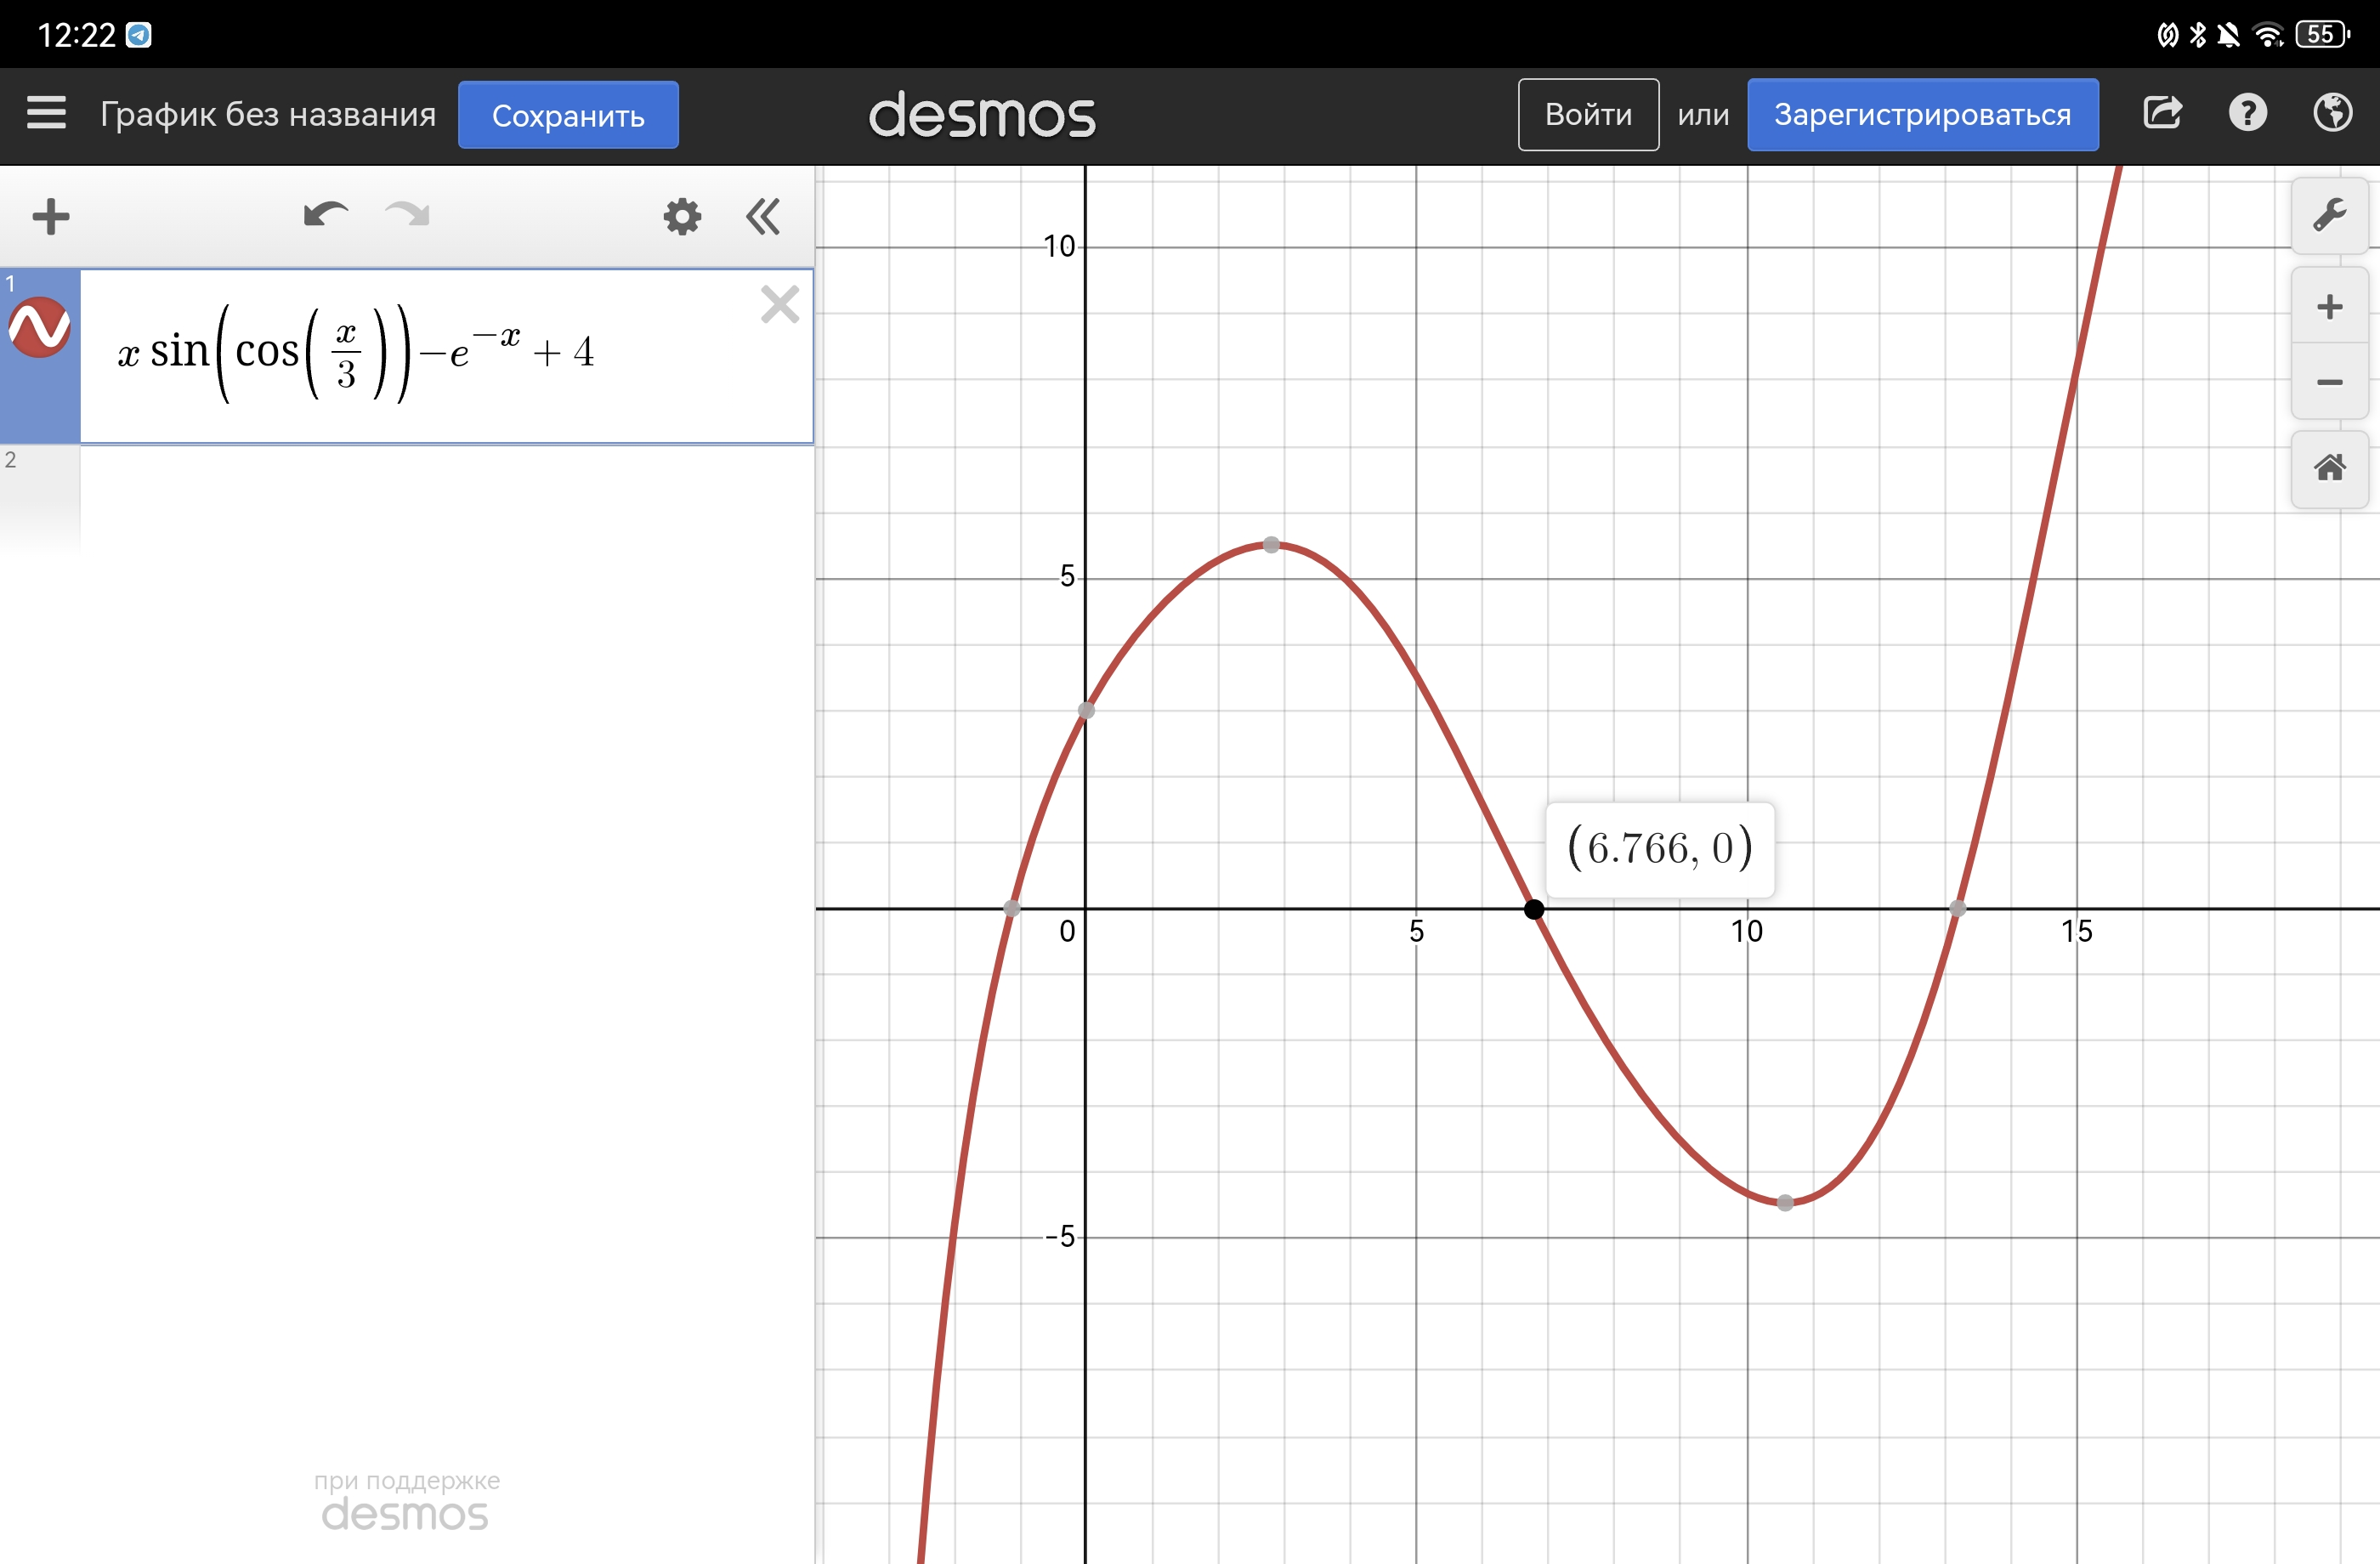

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A, B = 0, 10

def f(x):
    return x * np.sin(np.cos(x / 3)) - np.exp(-x) + 4

In [ ]:
def analyze(method, stop_condition="f"):
    for epsilon in [10 ** -3, 10 ** -6, 10 ** -9]:
        x_root, f_root = method(epsilon, stop_condition)
        print(f"Точность {epsilon:.0E}: f({x_root}) = {f_root:.0E}")

### Метод дихотомии

Метод дихотомии заключается в выборе $ x_{left} $ и $ x_{right} $ (изначально $ x_{left} = a $, а $ x_{right} = b $), таких, что $ sign(f(x_{left})) = -sign(f(x_{right}))$ (дополнительно примем $ sign(f(x_{left}))) = 1 $, или добьемся этого, работая с функцией $ -f(x) $).

Тогда по теореме Больцано-Коши $ \exists x_{root}: x_{left} \le x_{root} \le x_{right} \space \space f(x_{root}) = 0 $.

Итеративно будем выбирать $ x_{pivot} = \frac{x_{left} + x_{right}}{2} $ и смотреть на $ sign(f(x_{pivot})) $ -  в случае если $ sign(f(x_{pivot})) > 0$, примем $ x_{right} = x_{pivot} $, иначе примем $ x_{left} = x_{pivot} $.

Повторяем до сходимости (пока $ |f(x_{pivot})| > \varepsilon $ или $ |a - b| > \varepsilon $).

In [ ]:
def dichotomy(epsilon, stop_condition):
    global A, B, f

    x_left, x_right = A, B

    if (f(x_left) > 0):
        func = lambda x: -f(x)

    x_pivot = (x_left + x_right) / 2
    f_pivot = func(x_pivot)

    while (abs(f_pivot) if stop_condition == "f" else abs(x_left - x_right)) > epsilon:
        if np.sign(f_pivot) < 0:
            x_left = x_pivot
        elif np.sign(f_pivot) > 0:
            x_right = x_pivot
        x_pivot = (x_left + x_right) / 2
        f_pivot = func(x_pivot)
    return x_pivot, f_pivot

In [ ]:
analyze(dichotomy, "step")

Точность 1E-03: f(6.76605224609375) = 5E-05
Точность 1E-06: f(6.766025722026825) = -5E-07
Точность 1E-09: f(6.766025964461733) = -5E-10


### Метод Ньютона

Метод Ньютона основывается на методе сжимающих отображений и находит неподвижную точку данного отображения.

Применимо к уравнениям, его формула выглядит так: $ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $.
Здесь ищется $ x^*: f(x^*) = 0 $, где $ x^* $ - неподвижная точка отображения $ \frac{f(x)}{f'(x)} $.

Повторяем операцию, пока не достигнем $ x_I: |f(x_I)| < \varepsilon $

In [ ]:
def f_derivative(x):
    return np.sin(np.cos(x / 3)) - (x / 3) * np.cos(np.cos(x / 3)) * np.sin(x / 3) + np.exp(-x)

In [ ]:
def newton_raphson(epsilon, stop_condition, x=5):
    step = np.inf
    while (abs(f(x)) if stop_condition == "f" else abs(step)) > epsilon:
        step = f(x) / f_derivative(x)
        x -= step
    return x, f(x)

In [ ]:
analyze(newton_raphson)

Точность 1E-03: f(6.766024673535857) = 3E-06
Точность 1E-06: f(6.76602596469636) = 2E-13
Точность 1E-09: f(6.76602596469636) = 2E-13


#### Проблемы метода Ньютона
В ограничениях задачи метод Ньютона может работать не подходящим образом по следующим причинам:
* метод может выходить за рамки ограничений функции $ [a, b] $
* из-за этого метод может сойтись к корню, не принадлежащему отрезку $ [a, b] $

Сгенерируем несколько различных точек на отрезке $ [a, b] $ и посмотрим, в каких случаях метод сходится к корням не в отрезке.

In [ ]:
x = -5
x_root = -float("inf")
while x < 15:
    x_root, _ = newton_raphson(0.01, "step", x)
    x += 0.2
    print(round(x, 3), round(x_root, 3))


-4.8 -1.13
-4.6 -1.13
-4.4 -1.13
-4.2 -1.13
-4.0 -1.13
-3.8 -1.13
-3.6 -1.13
-3.4 -1.13
-3.2 -1.13
-3.0 -1.13
-2.8 -1.13
-2.6 -1.13
-2.4 -1.13
-2.2 -1.13
-2.0 -1.13
-1.8 -1.13
-1.6 -1.13
-1.4 -1.13
-1.2 -1.13
-1.0 -1.13
-0.8 -1.13
-0.6 -1.13
-0.4 -1.13
-0.2 -1.13
0.0 -1.13
0.2 -1.13
0.4 -1.13
0.6 -1.13
0.8 -1.13
1.0 -1.13
1.2 -1.13
1.4 -1.13
1.6 -1.13
1.8 -1.13
2.0 -1.13
2.2 -1.13
2.4 -1.13
2.6 -1.13
2.8 -1.13
3.0 nan
3.2 -1.13
3.4 42.693
3.6 13.198
3.8 13.198
4.0 -1.13
4.2 6.766
4.4 6.766
4.6 6.766
4.8 6.766
5.0 6.766
5.2 6.766
5.4 6.766
5.6 6.766
5.8 6.766
6.0 6.766
6.2 6.766
6.4 6.766
6.6 6.766
6.8 6.766
7.0 6.766
7.2 6.766
7.4 6.766
7.6 6.766
7.8 6.766
8.0 6.766
8.2 6.766
8.4 6.766
8.6 6.766
8.8 6.766
9.0 6.766
9.2 6.766
9.4 6.766
9.6 6.766
9.8 6.766
10.0 61.457
10.2 -1.13
10.4 -1.13
10.6 -1.13
10.8 315.692
11.0 32.617
11.2 -1.13
11.4 6.766
11.6 13.198
11.8 13.198
12.0 13.198
12.2 13.198
12.4 13.198
12.6 13.198
12.8 13.198
13.0 13.198
13.2 13.198
13.4 13.198
13.6 13.198
13.8 13.198

/tmp/ipython-input-4129782197.py:4: RuntimeWarning: overflow encountered in exp
  return x * np.sin(np.cos(x / 3)) - np.exp(-x) + 4
/tmp/ipython-input-2327444576.py:2: RuntimeWarning: overflow encountered in exp
  return np.sin(np.cos(x / 3)) - (x / 3) * np.cos(np.cos(x / 3)) * np.sin(x / 3) + np.exp(-x)
/tmp/ipython-input-575830721.py:4: RuntimeWarning: invalid value encountered in scalar divide
  step = f(x) / f_derivative(x)
